In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\IDEAL COM\Downloads\Compressed\archive_20\insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


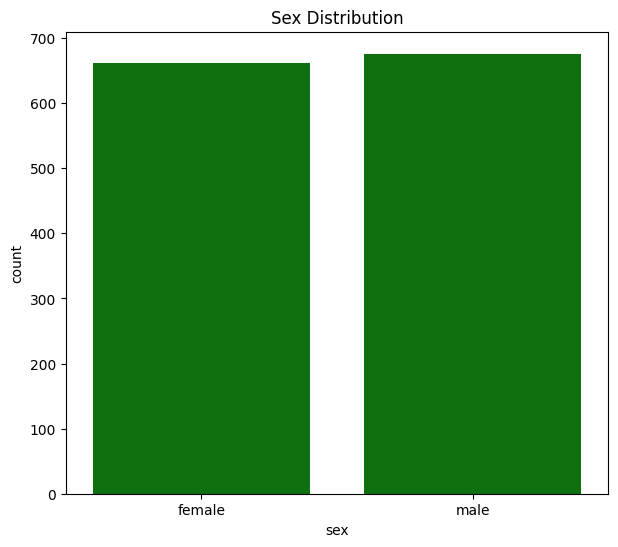

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(x='sex',data=data,color='green')
plt.title('Sex Distribution')
plt.show()

In [9]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

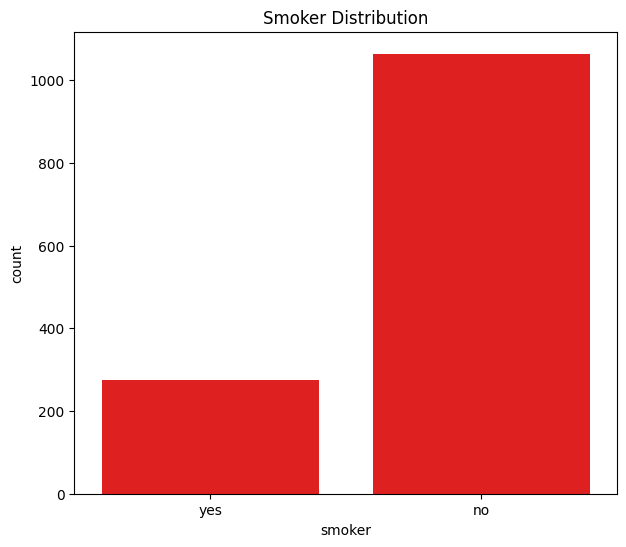

In [15]:
plt.figure(figsize=(7,6))
sns.countplot(x='smoker',data=data,color='red')
plt.title('Smoker Distribution')
plt.show()

In [10]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

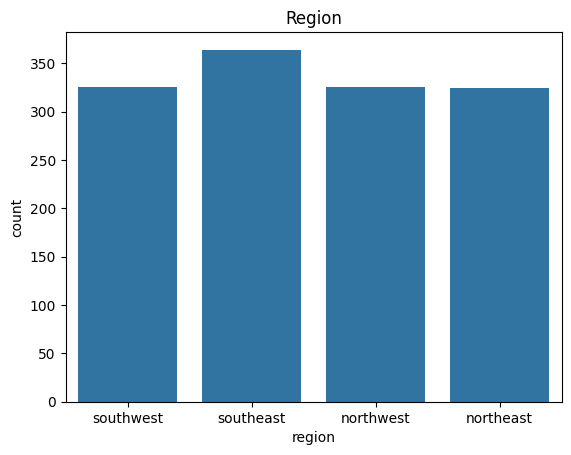

In [22]:
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [11]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Age Distribution

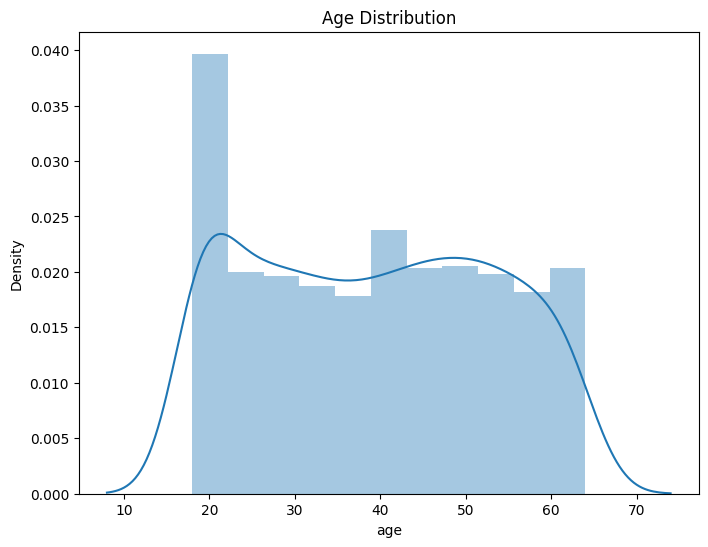

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

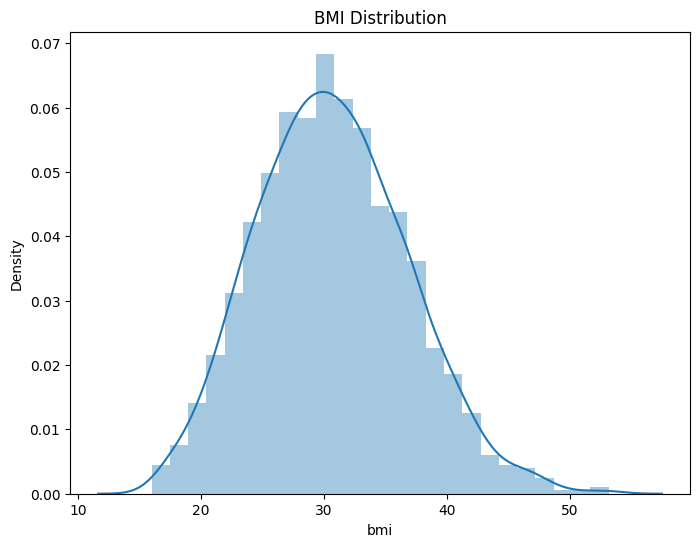

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

### Normel People BMi is 18.5-24

## No of Children Count

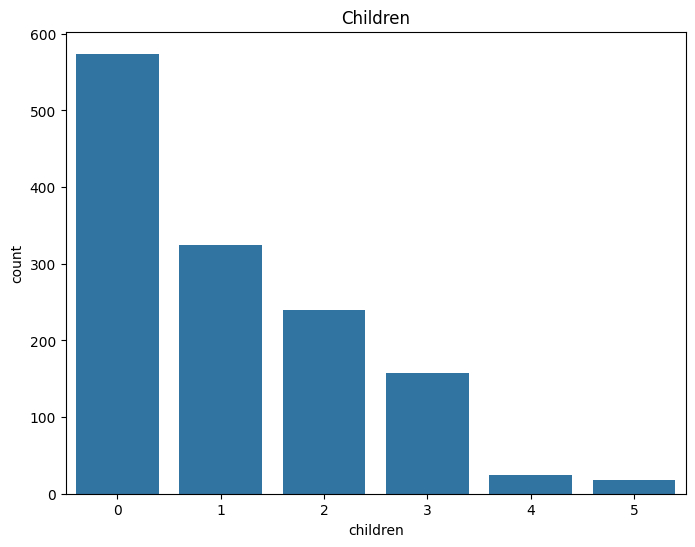

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [21]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

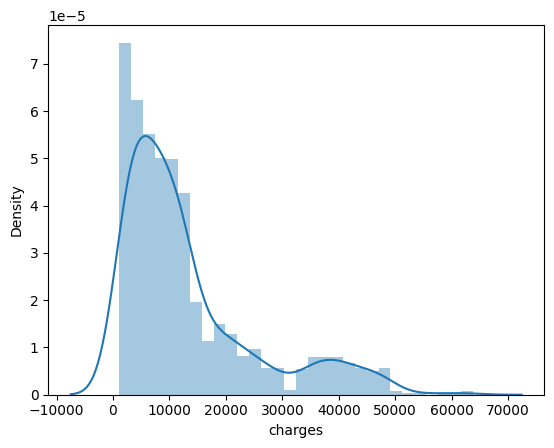

In [24]:
sns.distplot(data['charges'])
plt.show()

# Data Preprocessing

## Encoding Data

In [25]:
# Encoding Sex Column
data.replace({'sex':{'male':0,'female':1,}},inplace=True)

# Encoding Smoker Column
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region Column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# spliting the features and target

In [27]:
x=data.drop(columns='charges',axis=1)
y=data['charges']

In [29]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Traning

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [39]:
traing_data_prediction=lr.predict(x_train)

### R Squre Value

In [40]:
from sklearn.metrics import r2_score,recall_score


In [41]:
r2_score=r2_score(y_train,traing_data_prediction)

In [42]:
print('R2 Score on Training:',r2_score)

R2 Score on Training: 0.751505643411174


In [44]:
from sklearn.metrics import r2_score

In [45]:
test_data_prediction=lr.predict(x_test)
r2_score=r2_score(y_test,test_data_prediction)
print('R2 value on Test data:',r2_score)

R2 value on Test data: 0.7447273869684076


# Build a Predictive Model

In [49]:
input_data=(30,0,35.3,0,0,1)
ar=np.asarray(input_data)
ar_reshape=ar.reshape(1,-1)
pridiction=lr.predict(ar_reshape)
print('The Value of USD Insurance is:',pridiction[0])

The Value of USD Insurance is: 30783.861744967013
